In [4]:
# from ex_bnnstgp import BNN_model
import pandas as pd
import h5py
import numpy as np
import torch
import os
import sys

current_dir = os.getcwd()
sub_dir = os.path.join(current_dir, 'bnnstgp') 
sys.path.append(sub_dir)
sub_dir = os.path.join(current_dir, '../') 
sys.path.append(sub_dir)

# Change to your R home
os.environ['R_HOME'] = '/home/ellahe/.conda/envs/bnnstgp/lib/R'
from pkg_bnnstgp import BNN_model


# import rpy2.robjects as robjects


from rpy2.robjects.packages import importr

utils = importr('utils')



# options(repos=c('https://repo.miserver.it.umich.edu/cran/'))
# utils.install_packages('BayesGPfit', verbose = 0,repos = 'https://repo.miserver.it.umich.edu/cran/')
GP = importr('BayesGPfit')

Y = pd.read_csv("data/y1.csv").iloc[:,1].values
idx = np.invert(np.isnan(Y))
Y = Y[idx]

hf = h5py.File('/scratch/jiankang_root/jiankang1/ellahe/image1.hdf5', 'r')
img1 = hf.get('img')['img1'][()][idx,:]
# img2 = hf.get('img')['img2'][()][idx,:]

h2 = h5py.File('/scratch/jiankang_root/jiankang1/ellahe/coord1.hdf5', 'r')
coord1 = h2.get('coord')['coord1'][()]
# coord2 = h2.get('coord')['coord2'][()]

hf = h5py.File('/scratch/jiankang_root/jiankang1/ellahe/image_fMRI2.hdf5', 'r')
img2 = hf.get('img')['img_fMRI'][()][idx,:]

h2 = h5py.File('/scratch/jiankang_root/jiankang1/ellahe/coord_fMRI2.hdf5', 'r')
coord2 = h2.get('coord')['coord_fMRI'][()]

coord = [coord1, coord2]
img_data = [img1, img2]

Start
using CPU


In [5]:
rep_num = 10
a = 0.01
b = 100 
poly_degree = 18
num_weight_samples = 50
lamb = 10
n_hid = 128
n_hid2 = 16
lr = 3e-3
model_dir = "multi_test_resize_all2"
# model_dir = "model_lam5"
# model_save_path = "/scratch/jiankang_root/jiankang1/ellahe/multi_test_resize_all2/"+model_dir
model_save_path = "/scratch/jiankang_root/jiankang1/ellahe/"+model_dir
os.makedirs(model_save_path, exist_ok=True)
num_layer = 2
num_epochs = 131
thred = 0.4
back_image2 = "data/neuroimaging/AAL_MNI_2mm.nii"
back_image1 = "data/neuroimaging/AAL_90_3mm.nii"
regioninfo_file1 = "data/neuroimaging/AALregion_full.xls"
regioninfo_file2 = "data/neuroimaging/AAL_region_functional_networks.csv"
mni_file1 = "MNI_coords.csv"
mni_file2 = "MNI_coords_2mm.csv"
fdr_thred = 0.3
batch_size = 128
nii_save_path = model_save_path+'/select_region'

BNN_neuroimg = BNN_model(coord=coord, imgs=img_data, cov=np.zeros((img_data[0].shape[0],1)),
                         Y=Y,rep=rep_num,a=a,b=b, poly_degree=poly_degree, 
                         N_saves=num_weight_samples,
                         lamb=lamb,n_hid=n_hid, n_hid2=n_hid2, 
                         lr=lr,path=model_save_path,nb_layer=num_layer, n_epochs=num_epochs,
                        thred = thred, bg_image1 = back_image1, bg_image2 = back_image2, 
                         region_info1 = regioninfo_file1, 
                         region_info2 = regioninfo_file2, mni_file1 = mni_file1,
                         mni_file2 = mni_file2, batch_size=batch_size,
                        nii_path = nii_save_path, fdr_thred = fdr_thred, 
                         n_img=len(img_data),
                        device='cuda' if torch.cuda.is_available() else 'cpu')
BNN_neuroimg.load_data()
# R2 = BNN_neuroimg.train_model()
# BNN_neuroimg.beta_post()

In [ ]:
R2 = BNN_neuroimg.train_model()

Epoch 0, train time 96.0729 s, train MSE 1449.7301, train R2 0.000
  Epoch 0, test time 25.1439 s, test MSE 2.2384, test R2 0.012


sta 44
Statistical Summary of Stability Scores:
Mean: 0.005153816696451365
Median: 0.0
Standard Deviation: 0.030675974327303474
Min: 0.0
Max: 0.5


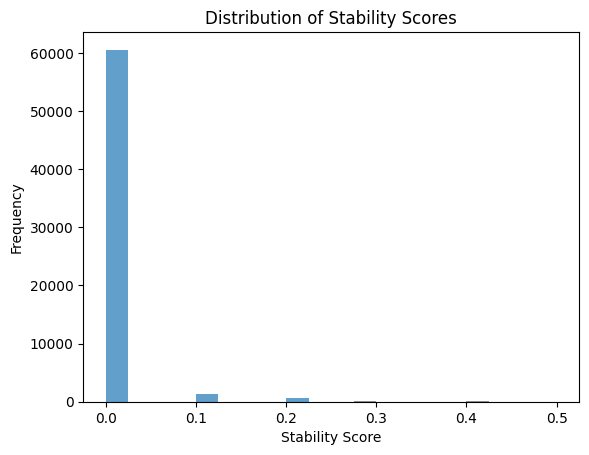

  AAL_Region_Names  count  percentage  min  max    mean       std
0     Precentral_R      8   24.242424  0.4  0.5  0.4125  0.035355
1   Parietal_Inf_L      8   24.242424  0.4  0.5  0.4125  0.035355
2    Postcentral_R      4   12.121212  0.4  0.5  0.4250  0.050000
3    Frontal_Mid_R      3    9.090909  0.4  0.4  0.4000  0.000000
4   Parietal_Sup_R      3    9.090909  0.4  0.4  0.4000  0.000000
5    Postcentral_L      2    6.060606  0.4  0.4  0.4000  0.000000
6   Parietal_Sup_L      2    6.060606  0.4  0.4  0.4000  0.000000
7    Frontal_Sup_R      1    3.030303  0.4  0.4  0.4000       NaN
8   Cingulum_Mid_R      1    3.030303  0.4  0.4  0.4000       NaN
9        Putamen_R      1    3.030303  0.5  0.5  0.5000       NaN
sta 866
Statistical Summary of Stability Scores:
Mean: 0.00880731254900211
Median: 0.0
Standard Deviation: 0.0462639642146981
Min: 0.0
Max: 0.7


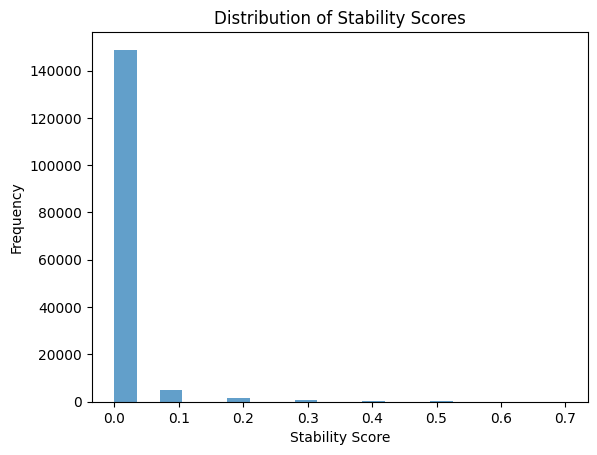

  AAL_Region_Names  count  percentage  min  max      mean       std
0     Precentral_R    348   65.046729  0.4  0.6  0.445115  0.052645
1    Postcentral_R     83   15.514019  0.4  0.6  0.431325  0.049208
2    Frontal_Mid_R     68   12.710280  0.4  0.5  0.450000  0.050372
3    Frontal_Sup_R     19    3.551402  0.4  0.5  0.457895  0.050726
4    Frontal_Mid_L     17    3.177570  0.4  0.5  0.423529  0.043724


In [3]:
# different split
train_ratio = 0.8
rep =  10
fdr_path = "/scratch/jiankang_root/jiankang1/ellahe/multi_test_resize_all2/"+model_dir+"/Voxel2"
model_save_path = "/scratch/jiankang_root/jiankang1/ellahe/multi_test_resize_all2/"+model_dir

# BNN_neuroimg.beta_fdr_control(rep=rep,path=model_save_path,train_ratio=train_ratio,fdr_path=fdr_path)


# total data
train_ratio = 1
rep = 1
model_dir2 = "multi_test_resize_all2"
model_save_path = "/scratch/jiankang_root/jiankang1/ellahe/multi_test_resize_all2/"+model_dir2
# os.makedir(model_save_path)

# BNN_neuroimg = BNN_model(coord=coord, imgs=img_data, cov=np.zeros((img_data[0].shape[0],1)),
#                          Y=Y,rep=rep_num,a=a,b=b, poly_degree=poly_degree, N_saves=num_weight_samples,
#                          lamb=lamb,n_hid=n_hid, n_hid2=n_hid2, lr=lr,path=model_save_path,nb_layer=num_layer, n_epochs=num_epochs,
#                         thred = thred, bg_image1 = back_image1, bg_image2 = back_image2,
#                          region_info1 = regioninfo_file1, 
#                          region_info2 = regioninfo_file2, batch_size=batch_size,
#                         nii_path = nii_save_path, n_img=len(img_data), train_ratio=train_ratio,
#                         device='cuda' if torch.cuda.is_available() else 'cpu')

# BNN_neuroimg.load_data()
# BNN_neuroimg.train_model() 

fdr_path = "/scratch/jiankang_root/jiankang1/ellahe/"+model_dir+"/Voxel2"
# BNN_neuroimg.beta_fdr_control(rep=rep,path=model_save_path,train_ratio=train_ratio,fdr_path=fdr_path)

h2 = h5py.File('/scratch/jiankang_root/jiankang1/ellahe/coord1.hdf5', 'r')
coord1 = h2.get('coord')['coord1'][()]

h2 = h5py.File('/scratch/jiankang_root/jiankang1/ellahe/coord_fMRI2.hdf5', 'r')
coord2 = h2.get('coord')['coord_fMRI'][()]

coord = [coord1, coord2]

BNN_neuroimg.output_selected(fdr_path=fdr_path, original_coord = coord)